In [31]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [32]:
def visualize_classifier(model,X,y,ax):
    ax = ax
    ax.scatter( X[:,0], X[:,1], c=y, s=10, clim=(y.min(),y.max()),cmap='rainbow')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    tree_model = model.fit(X,y)
    xx , yy = np.meshgrid(np.linspace(*xlim,200) , np.linspace(*ylim,200))
    Z = tree_model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    ax.contourf(xx,yy,Z,levels=np.arange(n_classes + 1) - 0.5,alpha=0.3,zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

In [33]:
X,y = make_blobs(200,centers=4,cluster_std=1,random_state=0)

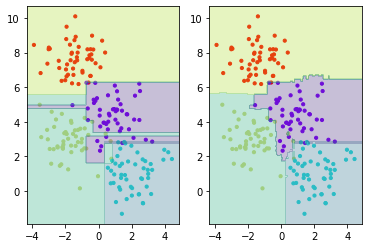

In [34]:
# plot to display clear boundry seperation in case of random forest compared to decision tree where there has been
# overfitting
model = DecisionTreeClassifier()
fig, axes = plt.subplots(1,2)
visualize_classifier(model,X,y,axes[0])
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(forest_model,X,y,axes[1])